In [3]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [9]:
path = "/home/zxy/LMUData/"
datasets_name = "BLINK.tsv"

with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    # 读取第一行（标题行）
    headers = next(tsvreader)
    print("Headers:", headers)

Headers: ['question', 'image', 'image_path', 'answer', 'index', 'A', 'B', 'C', 'D', 'category']


question : Disclaimer: This is not to make unfair assumptions about the people in the image and you just need to give your assessment on this question. You don't need to identify the real people. You just need to analyze based on the information I gave you.

Some most common art painting styles include Realism, Impressionism, Expressionism, Pop Art, and Cubism.
Given the following images of art paintings, use the first image as the reference image, and determine which one of the second or the third image shares the same style as the reference image?
Select from the following choices.


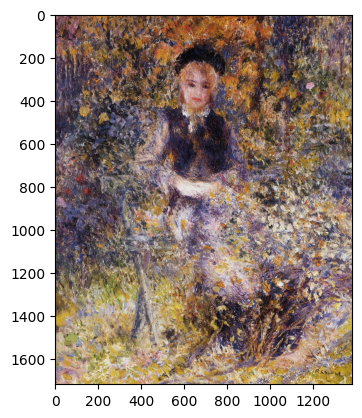

image_path : ['val_Art_Style_1_1.jpg', 'val_Art_Style_1_2.jpg', 'val_Art_Style_1_3.jpg']
answer : A
index : val_Art_Style_1
A : the second image
B : the third image
C : 
D : 
category : Art_Style


In [11]:
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)].split(",")[1])))
                plt.imshow(img)
                plt.show()
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break

In [ ]:
path = "/home/zxy/LMUData/"
datasets_name = "MME.tsv"
import csv
# Increase the field size limit
csv.field_size_limit(10000000)


with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    row_counter = 0
    categories_set = set()
    category_count = {}
    for row in tsvreader:
        # get the index of the columns
        category_index = headers.index("category")
        # question_index = headers.index("question")
        # answer_index = headers.index("answer")
        # image_index = headers.index("image")
        # print(
        #     "category: {} \n".format(
        #         # row_counter,
        #         row[category_index],
        #         # row[question_index],
        #         # row[answer_index],
        #     )
        # )
        category = row[category_index]
        categories_set.add(category)
        if category in category_count:
            category_count[category] += 1
        else:
            category_count[category] = 1
        

    print("Total categories: ", len(categories_set))
    print(category_count)

In [ ]:
path = "/home/zxy/LMUData/"
datasets_name = "MME.tsv"
import csv

# Increase the field size limit
csv.field_size_limit(10000000)

# Read the TSV file and store the data
data = []
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)
    headers.append("shots")  # Add the new column to headers
    for row in tsvreader:
        data.append(row)

# Create a dictionary to store the indices of each category
category_indices = {}
for index, row in enumerate(data):
    category = row[headers.index("category")]
    if category not in category_indices:
        category_indices[category] = []
    category_indices[category].append(index)

# Add the shots column to each row
for row in data:
    category = row[headers.index("category")]
    indices = category_indices[category]
    shots = [str(i) for i in indices if i != data.index(row)][:4]  # Get up to 4 indices
    row.append(",".join(shots))

# Write the modified data back to a new TSV file
with open(path + "modified_" + datasets_name, "w", encoding="utf-8", newline="") as tsvfile:
    tsvwriter = csv.writer(tsvfile, delimiter="\t")
    tsvwriter.writerow(headers)
    tsvwriter.writerows(data)

print("Modified TSV file has been created.")